<a href="https://colab.research.google.com/github/adzkia30/Project-data/blob/main/Proyek_ke_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Penerapan algoritma KNN dengan open dataset dari kaggle dg data minimal 500 baris
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()


Saving winequality-red.csv to winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Buat label, pisah fitur & target, split train–test
# 1. Buat label biner: quality >= 6 -> 1 (good), else 0 (bad)
df["label"] = (df["quality"] >= 6).astype(int)

# 2. Pisah fitur (X) dan target (y)
X = df.drop(['quality', 'label'], axis=1)
y = df['label']

# 3. Split train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
# Eksperimen K (1–20)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    acc_list.append(accuracy_score(y_test, pred))

acc_list


[0.76875,
 0.7125,
 0.73125,
 0.715625,
 0.740625,
 0.75,
 0.753125,
 0.753125,
 0.740625,
 0.765625,
 0.753125,
 0.753125,
 0.75625,
 0.74375,
 0.753125,
 0.765625,
 0.75625,
 0.74375,
 0.74375,
 0.753125]

In [ ]:
# Latih model dengan K terbaik dan evaluasi (#4)
# Misal dari acc_list kamu pilih k terbaik = 7
best_k = 7
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)   # <-- y_pred dibentuk di sini

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Akurasi:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.753125

Confusion Matrix:
 [[110  39]
 [ 40 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       149
           1       0.77      0.77      0.77       171

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [ ]:
# mengolah data menggunakan random forest classifier menggunakan dataset churn untuk membantu tim bisnis melakukan prediksi dan mengetahui faktor yang paling memengaruhi churn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("churn.csv")
df.head()

Saving churn.csv to churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Info umum
df.info()

# Cek nilai hilang
print("\nCek missing values:")
print(df.isnull().sum())

# Deskripsi statistik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


/tmp/ipython-input-4197426619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


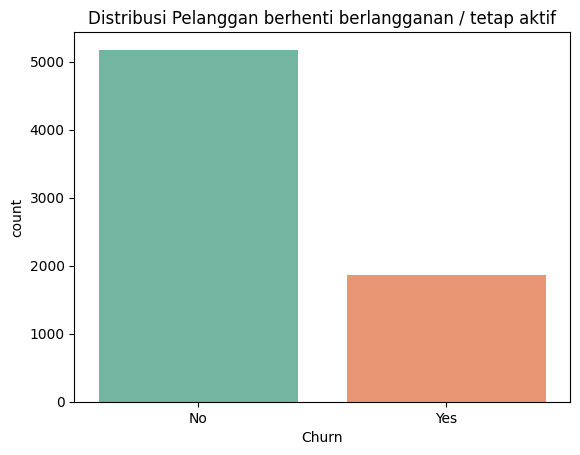

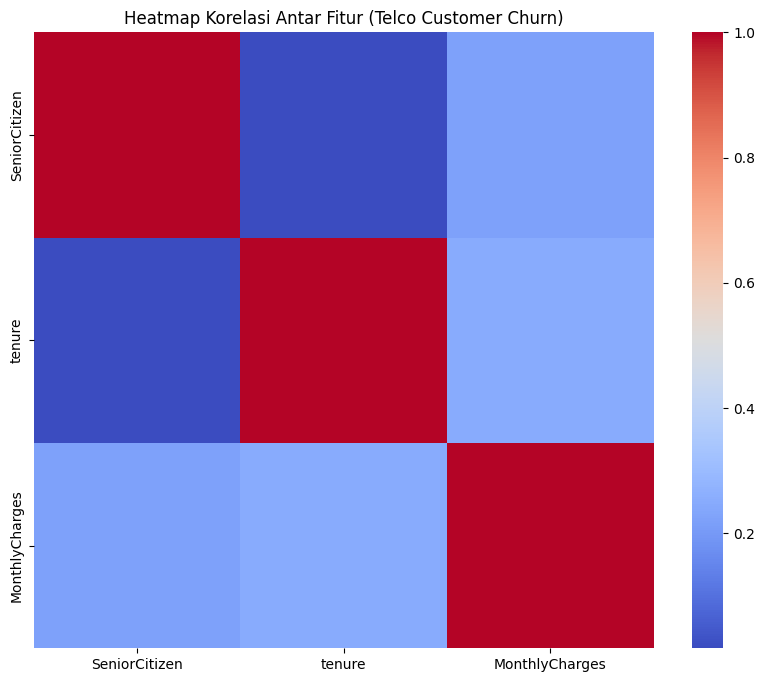

In [ ]:
# Distribusi target
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribusi Pelanggan berhenti berlangganan / tetap aktif")
plt.show()

# Korelasi antar fitur (numerik saja)
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur (Telco Customer Churn)")
plt.show()


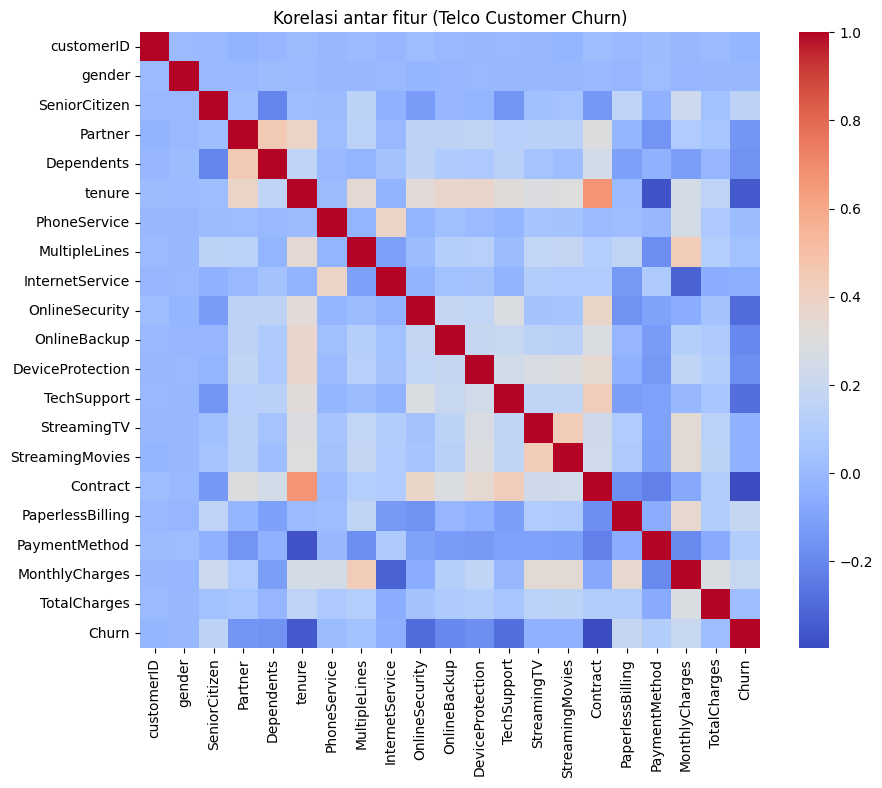

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==== 1. Encode data kategorikal menjadi numerik ====
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# ==== 2. Buat heatmap korelasi ====
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Korelasi antar fitur (Telco Customer Churn)")
plt.show()


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data training:", X_train.shape)
print("Jumlah data testing:", X_test.shape)

Jumlah data training: (5634, 20)
Jumlah data testing: (1409, 20)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Hapus kolom customerID (karena bukan fitur prediktif)
df = df.drop(columns=['customerID'])

# Label encoding untuk kolom kategori
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Pisahkan fitur dan target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Latih model
rf.fit(X_train, y_train)

# Tampilkan ringkasan model (seperti di kotak biru)
rf


RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi data uji
y_pred = rf.predict(X_test)

# Hitung akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model:, {acc:.3f}")

# Laporan klasifikasi
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model:, 0.798

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



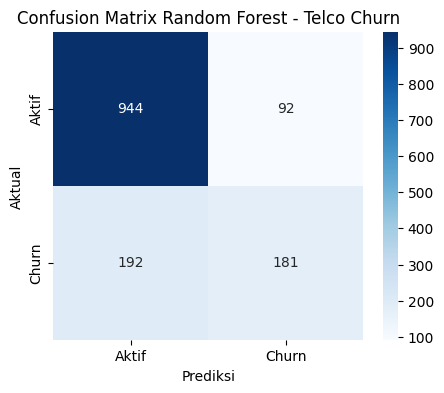

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Aktif", "Churn"],
            yticklabels=["Aktif", "Churn"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Random Forest - Telco Churn")
plt.show()


/tmp/ipython-input-2762501591.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Penting', y='Fitur', palette='viridis')


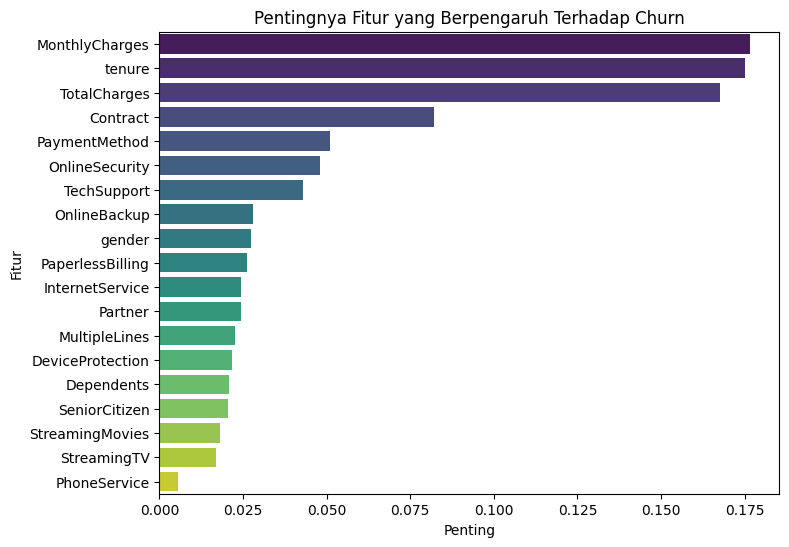

,Fitur,Penting
17,MonthlyCharges,0.176539
4,tenure,0.174955
18,TotalCharges,0.167721
14,Contract,0.081976
16,PaymentMethod,0.051153
8,OnlineSecurity,0.048006
11,TechSupport,0.043074
9,OnlineBackup,0.027847
0,gender,0.027486
15,PaperlessBilling,0.026085


In [ ]:
feature_importances = pd.DataFrame({
    'Fitur': X.columns,
    'Penting': rf.feature_importances_
}).sort_values(by='Penting', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x='Penting', y='Fitur', palette='viridis')
plt.title("Pentingnya Fitur yang Berpengaruh Terhadap Churn")
plt.show()

feature_importances

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
fname = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[fname]), sep=';')
df.head()

Saving winequality-red.csv to winequality-red (1).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Membuat label (Good / Bad wine)
# Mengubah quality menjadi label biner:
# quality >= 6 → Good (1)
# quality < 6 → Bad (0)

df["label"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

X = df.drop(["quality", "label"], axis=1)
y = df["label"]


In [ ]:
# Split data(80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# SVM Classification
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

# Prediksi SVM
y_pred_svm = svm_model.predict(X_test_scaled)


In [ ]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi KNN
y_pred_knn = knn.predict(X_test_scaled)


In [ ]:
# Evaluasi & perbandingan model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("=== Evaluasi SVM ===")
print("Akurasi:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("\n=== Evaluasi KNN ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


=== Evaluasi SVM ===
Akurasi: 0.771875
[[120  29]
 [ 44 127]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       149
           1       0.81      0.74      0.78       171

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320


=== Evaluasi KNN ===
Akurasi: 0.740625
[[108  41]
 [ 42 129]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       149
           1       0.76      0.75      0.76       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



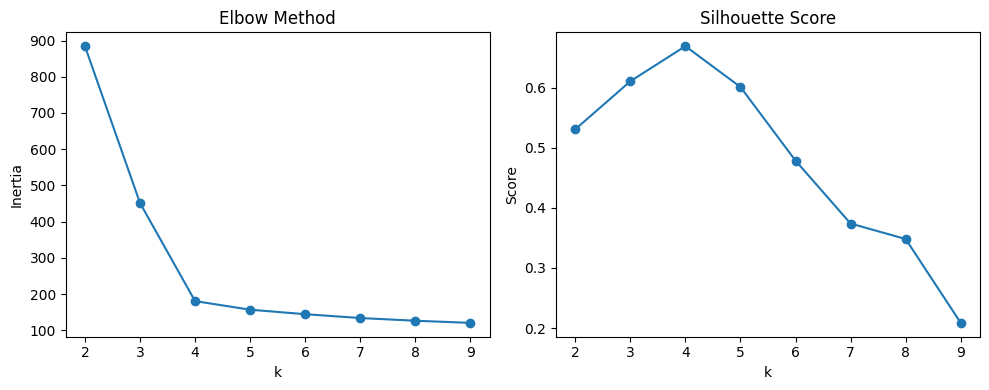

Cluster optimal = 4

Centroid (skala asli):
         Age        Income    App Time    Web Time  Purchase Count  \
0  26.340909  12674.102273  120.125000  240.397727       32.318182   
1  63.390805   4421.494253   29.195402   64.379310       90.379310   
2  41.454545  13749.556818  145.306818  205.079545       58.215909   
3  44.103448   5301.793103  119.977011   50.517241       85.022989   

   Spending Score  
0       84.556818  
1       42.919540  
2        8.761364  
3       29.747126  

Dataset sample:
   Age  Income  App Time  Web Time  Purchase Count  Spending Score  Cluster
0   64    4662        30        65              79              40        1
1   24   12240       114       248              37              80        0
2   47    3980       122        57             108              19        3
3   40    5506       156        25              44              27        3
4   41    3697        90         7              90              32        3

KESIMPULAN CLUSTER:

Cluster 0:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Generate dataset 350 sampel, 6 fitur
np.random.seed(42)
X, _ = make_blobs(
    n_samples=350,
    centers=4,
    n_features=6,
    cluster_std=[1.0, 1.4, 1.2, 1.6],
    random_state=42
)

# Map ke fitur realistis
def scale(arr, low, high):
    return low + (arr - arr.min())*(high-low)/(arr.max()-arr.min())

df = pd.DataFrame({
    "Age": scale(X[:,0], 18, 70).astype(int),
    "Income": scale(X[:,1], 2000, 15000).astype(int),
    "App Time": scale(X[:,2], 0, 180).astype(int),
    "Web Time": scale(X[:,3], 0, 300).astype(int),
    "Purchase Count": scale(X[:,4], 0, 120).astype(int),
    "Spending Score": scale(X[:,5], 1, 100).astype(int)
})

# 2. Scaling untuk clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Elbow + Silhouette
ks = range(2, 10)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ks, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k"); plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k"); plt.ylabel("Score")
plt.tight_layout()
plt.show()

# 4. Tentukan cluster optimal
best_k = ks[np.argmax(sil_scores)]
print("Cluster optimal =", best_k)

# 5. Final clustering
kfinal = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels = kfinal.fit_predict(X_scaled)

# Centroid skala asli
centroids = scaler.inverse_transform(kfinal.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=df.columns)
print("\nCentroid (skala asli):")
print(centroids_df)

# Tambah cluster ke dataset
df["Cluster"] = labels
print("\nDataset sample:")
print(df.head())

# 6. Kesimpulan karakter pelanggan
print("\nKESIMPULAN CLUSTER:")
for i, row in centroids_df.iterrows():
    print(f"\nCluster {i}:")
    print(f"- Rata-rata usia: {row['Age']:.1f}")
    print(f"- Pendapatan: {row['Income']:.1f}")
    print(f"- Aktivitas App: {row['App Time']:.1f} menit/hari")
    print(f"- Aktivitas Web: {row['Web Time']:.1f} menit/hari")
    print(f"- Frekuensi pembelian: {row['Purchase Count']:.1f}/tahun")
    print(f"- Spending score: {row['Spending Score']:.1f}")
